# Install requests library

In [5]:
!pip3 install requests

# Handling Session

In [1]:
import requests

BASE_URI = "http://api.github.com"
EP_USER_AUTHENTICATION = "/user"
EP_LIST_USER_REPOS = "/user/repos"


## using session manager to maintain session configuration
req_session = requests.session()
req_session.auth = ("user","pass")

# verify=False to disable SSL certificate verification
# Note using session manager to invoke the api request
response = req_session.get(url="{}{}".format(BASE_URI,EP_USER_AUTHENTICATION))

print(response.status_code)

# Note using session manager to invoke the api request
response = req_session.get(url="{}{}".format(BASE_URI,EP_LIST_USER_REPOS))

print(response.status_code)
print(response.json())

401
401
{'message': 'Requires authentication', 'documentation_url': 'https://docs.github.com/rest/repos/repos#list-repositories-for-the-authenticated-user', 'status': '401'}


# Handling Cookies

In [2]:
import requests

## handling cookies
req_cookies = {"mycookie1": "myvalue1"}

response = requests.get("https://httpbin.org/cookies", cookies=req_cookies)
print(response.status_code)
print(response.json())

## handling cookies via session manager
req_cookies = {"mycookie2": "myvalue2"}
req_session = requests.session()
req_session.cookies.update(req_cookies)
response = req_session.get("https://httpbin.org/cookies")
print(response.status_code)
print(response.json())

200
{'cookies': {'mycookie1': 'myvalue1'}}
200
{'cookies': {'mycookie2': 'myvalue2'}}


# Handling redirection & timeouts

In [3]:
import requests

# How to check for redirection?

# approach 1: check response history
# if it has 301 status then that means the request has been redirected at some point
response = requests.get("http://rahulshettyacademy.com")
print("STATUS CODE = {}".format(response.status_code))
print("RESPONSE HISTORY: {}".format(response.history))




'''
What is the purpose of the 'allow_redirects' parameter in Requests?
In Python's requests library, the allow_redirects parameter is used to control whether or not the library should automatically follow HTTP redirects (status codes like 301, 302, 303, 307, and 308). 
By default, allow_redirects is set to True, meaning that if the server responds with a redirect, the requests library will automatically perform the redirection to the new URL provided in the response headers.

When you set allow_redirects to False, the library will not follow redirects and will instead return the original response that includes the redirect status and the new location to which it is attempting to redirect.
'''

# approach 2: use allow_redirects=False in the request
# Note that timeout will wait for the specified time before returning the response. 
# This is generally used for synchromization due to heavy load.
response = requests.get("http://rahulshettyacademy.com", allow_redirects=False, timeout=1)
print("STATUS CODE = {}".format(response.status_code))

STATUS CODE = 200
RESPONSE HISTORY: [<Response [301]>]
STATUS CODE = 301


# Handling attachments

In [5]:
import requests

BASE_URL = "https://petstore.swagger.io/v2"
EP_UPLOAD_IMAGE = "/pet/{petID}/uploadImage"
petId = 9223372036854751000

URL = "{}{}".format(BASE_URL,EP_UPLOAD_IMAGE.format(petID=petId))

# attachment
files_attachment = {"file": open("puppy-1903313_640.jpg","rb")}
response = requests.post(url=URL, files=files_attachment)

print(response.status_code)
print(response.json())

200
{'code': 200, 'type': 'unknown', 'message': 'additionalMetadata: null\nFile uploaded to ./puppy-1903313_640.jpg, 55176 bytes'}


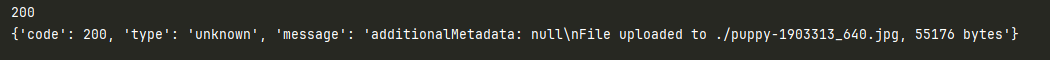